## Modelo Supervisado - Regresión

In [1]:
import pandas as pd
diabetes_df = pd.read_csv("../data/diabetes.csv")
print(diabetes_df.head())

   pregnancies  glucose  triceps  insulin   bmi  age  diabetes
0            0    106.7       29       72  26.2   24         0
1            8    142.3       33      233  38.9   62         1
2           12    140.2       31      123  34.1   65         1
3           12    130.8       38      293  31.2   30         0
4            0     91.3       31      188  21.4   51         0


### Creación de matrices de características y objetivos

In [2]:
# Extraemos las características (features) eliminando la columna 'glucose' del DataFrame
# axis=1 indica que eliminamos una columna, no una fila
# .values convierte el resultado en un array de NumPy
X = diabetes_df.drop("glucose", axis=1).values

# Extraemos la variable objetivo (target), que es la columna 'glucose'
# .values la convierte en un array de NumPy
y = diabetes_df["glucose"].values

# Mostramos el tipo de datos de X y y para confirmar que son arrays de NumPy
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Realizar predicciones a partir de una única característica

In [3]:
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape)

(1000,) (1000,)


Algunos modelos de aprendizaje automático en scikit-learn esperan que las entradas (X) sean una matriz 2D (matriz de características), incluso si solo tienes una única característica.

In [4]:
X_bmi = X_bmi.reshape(-1, 1) 
print(X_bmi.shape)

(1000, 1)


### Representación gráfica de la glucosa frente al índice de masa corporal

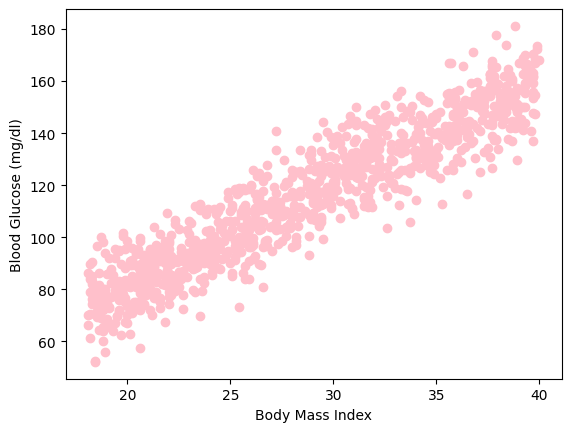

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y, color='pink')
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

### Ajuste de un modelo de regresión

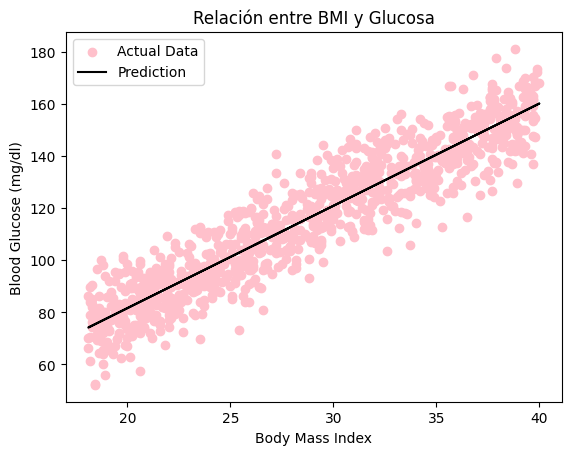

In [10]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

plt.scatter(X_bmi, y, color='pink', label='Actual Data')
plt.plot(X_bmi, predictions, color='black', label='Prediction')

plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.title("Relación entre BMI y Glucosa")
plt.legend()
plt.show()

### Mecánica de regresión

`y = ax + b`.
- La regresión lineal simple utiliza una sola característica.
- `y` = objetivo.
- `x` = característica única.
- `a`, `b` = parámetros/coeficientes del modelo: pendiente, intersección.

#### ¿Cómo elegimos a y b?
- Defina una función de error para cualquier recta.
- Elija la recta que minimice la función de error.
- Función de error = función de pérdida = función de coste.

### Función de Perdida

<img src="images/imagen4.png" width="40%">

### Mínimos cuadrados ordinarios

$$
RSS = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2
$$

Mínimos cuadrados ordinarios (MCO): minimizar RSS

### Regresión lineal en dimensiones superiores

$$
y = a_1x_1 + a_2x_2 + b
$$
Para ajustar un modelo de regresión lineal:
Se deben especificar 3 variables: `a1`, `a2`, `b`

En dimensiones superiores:

- Conocida como regresión múltiple.
- Se deben especificar los coeficientes para cada característica y la variable `b`
$$
y = a_1x_1 + a_2x_2 + a_3x_3 + \dots + a_nx_n + b
$$

### Regresión Lineal usando todas las caracteristicas

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

### Evaluación del Modelo

### R cuadrado

R² (Coeficiente de Determinación)

**¿Qué mide?**

Mide qué tan bien el modelo explica la variabilidad de la variable dependiente (y).

**Valor típico:**

Va de 0 a 1 (aunque puede ser negativo si el modelo es muy malo).

**Interpretación:**

- R² = 1: el modelo explica el 100% de la variabilidad de y.
- R² = 0: el modelo no explica nada de la variabilidad.
- R² = 0.75: el modelo explica el 75% de la variabilidad.

$$
R^2 = 1 - \frac{ \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 }{ \sum_{i=1}^{n} (Y_i - \bar{Y})^2 }
$$

In [14]:
reg_all.score(X_test, y_test)

0.8900975696296809

### Error cuadrático medio

**¿Qué mide?**

Mide el promedio del cuadrado de los errores entre los valores reales (y) y los predichos (ŷ).

**Interpretación:**

- Cuanto más pequeño el MSE, mejor es el modelo.
- Es sensible a los valores atípicos, porque los errores se elevan al cuadrado.
- Tiene la misma unidad que y².

La fórmula del **Mean Squared Error (MSE)** es:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

79.34045640582663


### Raíz del error cuadrático medio

**¿Qué mide el RMSE?**

- La precisión de un modelo de regresión.
- Específicamente, mide el error promedio de las predicciones.

La fórmula del **Root Mean Squared Error (RMSE)** es:

$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

In [17]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
print(rmse)

8.907325996382227


### Ajustar y predecir para la regresión

Ahora que ya has visto cómo funciona la regresión lineal, tu tarea consiste en crear un modelo de regresión lineal múltiple utilizando todas las características del conjunto de datos precargado sales_df. Como recordatorio, aquí tienes las dos primeras filas:

| tv      | radio    | social_media | sales      |
|---------|----------|--------------|------------|
| 13000.0 | 9237.76  | 2409.57      | 46677.90   |
| 41000.0 | 15886.45 | 2913.41      | 150177.83  |

A continuación, utilizarás este modelo para predecir las ventas en función de los valores de las características de prueba.

LinearRegression y train_test_split han sido precargados para ti desde sus respectivos módulos.

In [33]:
sales_df = pd.read_csv("../data/datos_ventas.csv")

# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [ 94423.97843525 136032.48103606], Actual Values: [100002.78 147274.4 ]


In [34]:
# Import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9390445330874143
RMSE: 9978.532345033065


### Motivación para la validación cruzada

La validación cruzada es un enfoque vital para evaluar un modelo. Maximiza la cantidad de datos de que dispone el modelo, ya que éste no solo se entrena, sino que también se prueba con todos los datos disponibles.

- El rendimiento del modelo depende de cómo dividimos los datos.
- Sí, el R cuadrado es representativo de la capacidad del modelo para generalizar datos desconocidos, es necesaria la ¡Validación cruzada!

<img src="images/imagen5.png" width="70%">

### Validación cruzada y rendimiento del modelo

- 5 pliegues = CV de 5 pliegues
- 10 pliegues = CV de 10 pliegues
- k pliegues = CV de k pliegues
- Más pliegues = Mayor coste computacional

#### 1. Evaluación más precisa del rendimiento

- En lugar de entrenar y probar el modelo una sola vez (con una única división de los datos), la validación cruzada divide los datos en múltiples partes (“folds”) y realiza varias iteraciones.
- Esto permite que cada observación esté al menos una vez en el conjunto de prueba y en el de entrenamiento, reduciendo el sesgo de evaluación.

#### 2. Reduce el sobreajuste (overfitting)

- Al probar el modelo en distintos subconjuntos, se verifica que no está aprendiendo únicamente patrones del conjunto de entrenamiento.
- Así se identifica si el modelo generaliza bien a datos no vistos.

#### 3. Ayuda a comparar modelos

- Cuando estás ajustando hiperparámetros o probando varios modelos (regresión lineal, ridge, lasso…), la validación cruzada da una métrica más robusta y confiable para decidir cuál funciona mejor.

#### 4. Útil cuando los datos son limitados

- Aprovecha al máximo el conjunto de datos, ya que todos los datos se usan tanto para entrenamiento como para validación en distintos momentos.

In [35]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
print(cv_results)

[0.94016039 0.943149   0.94030296 0.93128374 0.94389897 0.94002968]


In [36]:
# Calcula y muestra la media y la desviación estándar de los resultados de validación cruzada

# np.mean(cv_results): obtiene el promedio (media) de las puntuaciones de validación cruzada
# np.std(cv_results): calcula la desviación estándar, que indica la variabilidad entre las puntuaciones

print(np.mean(cv_results), np.std(cv_results))

0.9398041221141953 0.00410242923652077


In [37]:
# Calcula y muestra el intervalo de confianza del 95% para los resultados de validación cruzada

# np.quantile(cv_results, [0.025, 0.975]):
# Devuelve los cuantiles en el 2.5% y 97.5% de los resultados de validación cruzada.
# Esto indica los valores entre los cuales cae el 95% central de las puntuaciones.

print(np.quantile(cv_results, [0.025, 0.975]))

[0.93237698 0.94380522]


### Metricas

`np.mean(cv_results)`

**Media de rendimiento**

- **Qué mide:** El rendimiento promedio del modelo en todos los folds (subconjuntos de validación).
- **Por qué es útil:** Te da una estimación central del comportamiento del modelo. Es decir, lo que esperas que rinda en datos nuevos si todo va bien.


`np.std(cv_results)`

**Desviación estándar del rendimiento**

- **Qué mide:** La variabilidad de las puntuaciones de validación cruzada entre los distintos folds.
- **Por qué es útil:** Te permite evaluar la estabilidad del modelo. Una desviación estándar baja indica que el modelo tiene un comportamiento consistente, mientras que una alta puede señalar sobreajuste o inestabilidad.


`np.quantile(cv_results, [0.025, 0.975])`

**Intervalo de confianza del 95%**

- **Qué mide:** El rango en el que cae el 95% central de los resultados de validación cruzada.
- **Por qué es útil:** Te ayuda a conocer el mejor y peor escenario probable para el modelo. Aporta una medida de la incertidumbre en la estimación del rendimiento, lo cual es muy valioso para la toma de decisiones.

#### En el caso del ejemplo

#### Conclusiones basadas en las métricas de validación cruzada

- **l modelo tiene un buen rendimiento promedio:**
El valor de R² ≈ 0.9398 indica que el modelo explica aproximadamente el 94% de la variabilidad de los datos. Esto refleja un desempeño sólido en las predicciones.

- **La desviación estándar es baja (≈ 0.0041):**
Esto sugiere que el modelo es consistente entre los diferentes subconjuntos (folds) utilizados durante la validación cruzada. Es decir, el rendimiento del modelo no varía mucho de un fold a otro.

- **El intervalo de confianza del 95% ([0.9324, 0.9438]):**
El 95% de las puntuaciones de validación cruzada se encuentran dentro de este rango, lo que demuestra que el modelo es estable y mantiene un rendimiento alto incluso en sus peores escenarios.

#### Conclusión general

El modelo es preciso y estable, por lo que se considera fiable para realizar predicciones en datos nuevos similares a los de entrenamiento. Además, no muestra signos de sobreajuste ni de alta variabilidad.

### Interpretación de métricas de validación cruzada en regresión

#### `R²` (Coeficiente de determinación)

| Valor de R²      | Interpretación                                                  |
|------------------|-----------------------------------------------------------------|
| > 0.90           | **Excelente**: el modelo explica casi toda la variabilidad.     |
| 0.75 – 0.90      | **Bueno**: adecuado para la mayoría de problemas prácticos.     |
| 0.50 – 0.75      | **Aceptable**: el modelo es útil, pero podría mejorarse.        |
| < 0.50           | **Pobre**: el modelo no explica bien los datos.                 |
| ≤ 0              | **Pésimo**: el modelo es peor que una predicción constante.     |

#### `Desviación estándar (std) de R²`

| Valor de std     | Interpretación                                                  |
|------------------|-----------------------------------------------------------------|
| < 0.01           | **Muy baja variabilidad**: modelo muy estable.                  |
| 0.01 – 0.05      | **Moderada**: cierta variación, pero aceptable.                 |
| > 0.05           | **Alta**: rendimiento inestable entre los folds.                |
| > 0.1            | **Muy alta**: posible overfitting o mala calidad de los datos.  |

#### `Intervalo de confianza 95% de R²`

- **Estrecho y alto** (por ejemplo: `[0.93, 0.94]`) → **Excelente**: rendimiento consistente.
- **Amplio pero alto** (por ejemplo: `[0.80, 0.94]`) → **Inconsistente pero útil**.
- **Muy amplio o bajo** (por ejemplo: `[0.10, 0.60]`) → **Pobre o poco confiable**.